## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import pickle

## Data Preprocessing 

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,Sale Price,Lot Area,Full Bathroom,Half Bathroom,Bedroom,Kitchen,Total Rooms,Car Garage,Basement
0,215000,31770,1,0,3,1,7,2,1
1,105000,11622,1,0,2,1,5,1,0
2,172000,14267,1,1,3,1,6,1,0
3,244000,11160,2,1,3,1,8,2,1
4,189900,13830,2,1,3,1,6,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sale Price     2930 non-null   int64 
 1   Lot Area       2930 non-null   int64 
 2   Full Bathroom  2930 non-null   int64 
 3   Half Bathroom  2930 non-null   int64 
 4   Bedroom        2930 non-null   int64 
 5   Kitchen        2930 non-null   int64 
 6   Total Rooms    2930 non-null   int64 
 7   Car Garage     2930 non-null   object
 8   Basement       2930 non-null   object
dtypes: int64(7), object(2)
memory usage: 206.1+ KB


In [5]:
# Converting object columns to integers, coercing errors to NaN
df['Car Garage'] = pd.to_numeric(df['Car Garage'], errors='coerce')
df['Basement'] = pd.to_numeric(df['Basement'], errors='coerce')
df.dtypes

Sale Price         int64
Lot Area           int64
Full Bathroom      int64
Half Bathroom      int64
Bedroom            int64
Kitchen            int64
Total Rooms        int64
Car Garage       float64
Basement         float64
dtype: object

In [6]:
# Checking for missing values
missing_data = df.isnull().sum()/len(df) * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data

Basement      0.068259
Car Garage    0.034130
dtype: float64

In [7]:
# Filling missing values for numerical columns with the mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols]= df[num_cols].fillna(df[num_cols].mean())
df.isnull().sum().sum()

0

In [8]:
# adding new columns(features)
df['Total Bathrooms'] = df['Full Bathroom'] + 0.5 * df['Half Bathroom']
df['Rooms per Area'] = df['Total Rooms'] / df['Lot Area']

In [9]:
# Splitting features and target
X = df.drop('Sale Price', axis=1)
y = df['Sale Price']

## Splitting Data to train models

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Models

In [11]:
# Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

In [12]:
# Train Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [13]:
# Train Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

c:\Users\arsal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+12, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(


In [31]:
# Train XGBoost Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [32]:
# Train Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [15]:
# Initialize and Train CatBoost Model
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, verbose=100, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

0:	learn: 74836.7974081	total: 222ms	remaining: 3m 42s
100:	learn: 35711.6373669	total: 331ms	remaining: 2.94s
200:	learn: 32914.9403647	total: 433ms	remaining: 1.72s
300:	learn: 30985.8382814	total: 541ms	remaining: 1.26s
400:	learn: 29641.7372992	total: 648ms	remaining: 968ms
500:	learn: 28492.2999649	total: 754ms	remaining: 751ms
600:	learn: 27547.4402933	total: 863ms	remaining: 573ms
700:	learn: 26693.3401997	total: 973ms	remaining: 415ms
800:	learn: 25998.1543751	total: 1.08s	remaining: 268ms
900:	learn: 25322.8911839	total: 1.19s	remaining: 131ms
999:	learn: 24678.3660937	total: 1.29s	remaining: 0us


In [16]:
# Train LightGBM Model
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 10
[LightGBM] [Info] Start training from score 178582.207765


In [17]:
# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('lgb', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('ridge', Ridge(alpha=1.0))
]
# Meta-model (final estimator)
meta_model = LinearRegression()
# Build Stacking Regressor
stack_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 10
[LightGBM] [Info] Start training from score 178582.207765
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 1875, number of used features: 10
[LightGBM] [Info] Start training from score 179301.145067
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead

## Evaluting predictions

In [18]:
# Evaluating Linear Regression predictions
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
print(f"R² Score (Linear Regression): {r2_lin:.2f}")
print(f"MAE (Linear Regression): ₹{mae_lin:.2f}")

R² Score (Linear Regression): 0.68
MAE (Linear Regression): ₹35125.82


In [19]:
# Evaluating Ridge Regression predictions
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"R² Score (Ridge Regression): {r2_ridge:.2f}")
print(f"MAE (Ridge Regression): ₹{mae_ridge:.2f}")

R² Score (Ridge Regression): 0.67
MAE (Ridge Regression): ₹35206.43


In [20]:
# Evaluating Lasso Regression predictions
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
print(f"R² Score (Lasso Regression): {r2_lasso:.2f}")
print(f"MAE (Lasso Regression): ₹{mae_lasso:.2f}")

R² Score (Lasso Regression): 0.68
MAE (Lasso Regression): ₹35124.27


In [33]:
# Evaluating XGBoost predictions
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test,y_pred_xgb)
print(f"R² Score (XGBoost): {r2_xgb:.2f}")
print(f"MAE (XGBoost): ₹{mae_xgb:.2f}")

R² Score (XGBoost): 0.75
MAE (XGBoost): ₹28922.85


In [34]:
# Evaluating Random Forest predictions
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
print(f"R² Score (Random Forest): {r2_rf:.2f}")
print(f"MAE (Random Forest): ₹{mae_rf:.2f}")

R² Score (Random Forest): 0.77
MAE (Random Forest): ₹27911.86


In [21]:
# Evaluating Catboost predictions
r2_cat = r2_score(y_test, y_pred_cat)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
print(f"R² Score (CatBoost): {r2_cat:.2f}")
print(f"MAE (CatBoost): ₹{mae_cat:.2f}")

R² Score (CatBoost): 0.78
MAE (CatBoost): ₹28103.98


In [22]:
# Evaluating LightGBM predictions
r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
print(f"R² Score (LightGBM): {r2_lgb:.2f}")
print(f"MAE (LightGBM): ₹{mae_lgb:.2f}")

R² Score (LightGBM): 0.78
MAE (LightGBM): ₹28439.56


In [23]:
# Evaluating Stacking Regressor predictions
r2_stack = r2_score(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
print(f"R² Score (Stack Model): {r2_stack:.2f}")
print(f"MAE (Stack Model): ₹{mae_stack:.2f}")

R² Score (Stack Model): 0.77
MAE (Stack Model): ₹27883.45


## Visualization

### Actual vs Predicted Prices (Scatter Plot)

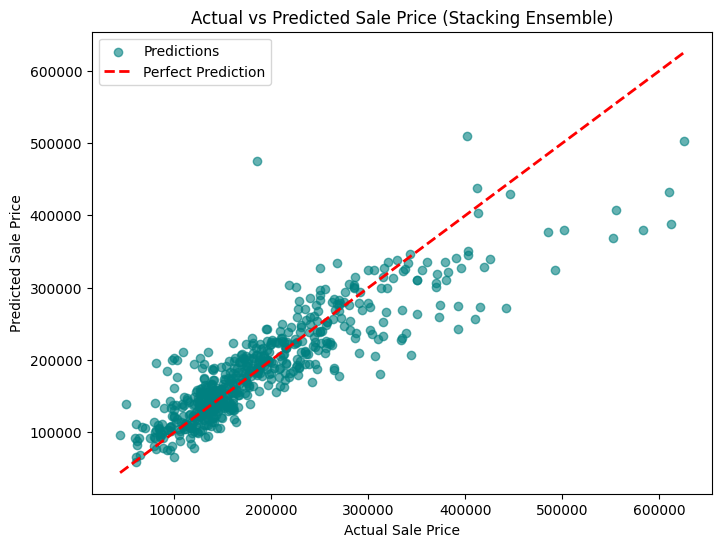

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_stack, alpha=0.6, color='teal', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Stacking Ensemble)')
plt.legend()
plt.show()


### Residual Plot (Prediction Errors)

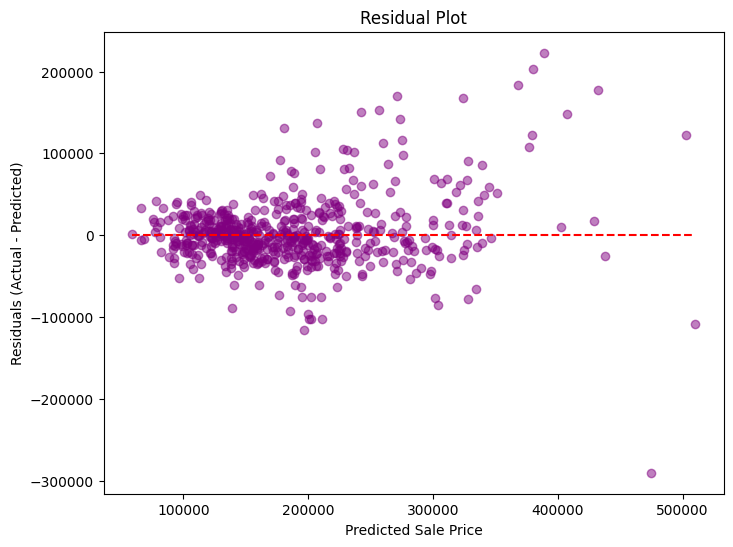

In [25]:
residuals = y_test - y_pred_stack

plt.figure(figsize=(8,6))
plt.scatter(y_pred_stack, residuals, alpha=0.5, color='purple')
plt.hlines(y=0, xmin=y_pred_stack.min(), xmax=y_pred_stack.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


### Feature Importance (Tree-Based Models Only)

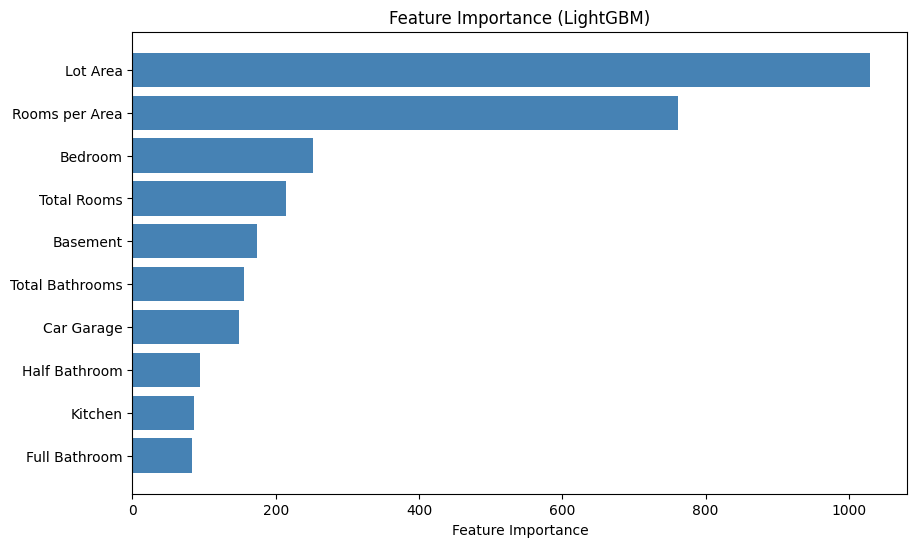

In [26]:
# For LightGBM model
importances = lgb_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (LightGBM)')
plt.gca().invert_yaxis()
plt.show()


### Distribution of Errors (Histogram of Residuals)

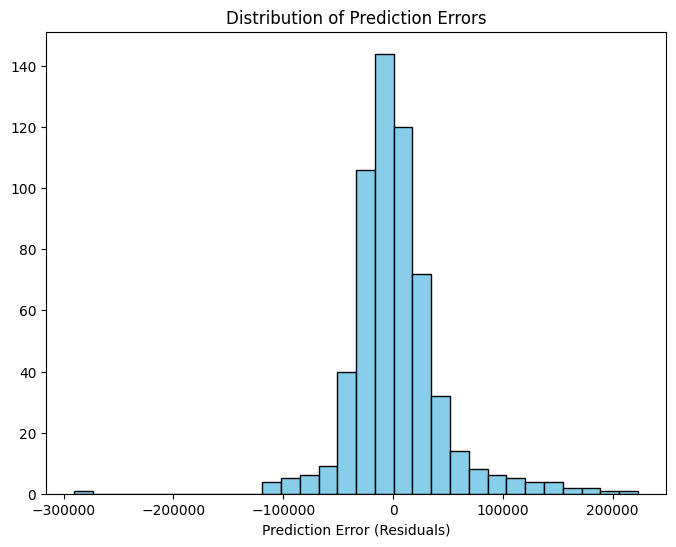

In [27]:
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Prediction Error (Residuals)')
plt.title('Distribution of Prediction Errors')
plt.show()


## Saving Models

In [35]:
# Save Linear Regression Model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(lin_model, f)

# Save Ridge Regression Model
with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)

# Save Lasso Regression Model
with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)

# Save XGBoost Model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Save Random Forest Model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save CatBoost Model
with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(cat_model, f)

# Save LightGBM Model
with open('lightgbm_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)

# Save Stacking Model
with open('stack_model.pkl', 'wb') as f:
    pickle.dump(stack_model, f)